In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as colors
import seaborn as sns
import itertools 
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline 
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [11]:
iris= sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
iris= iris.rename(index=str, columns={'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width',
                                      'petal_length':'3_petal_length',
                                      'petal_width':'4_petal_width'})
print(iris)

     1_sepal_length  2_sepal_width  3_petal_length  4_petal_width    species
0               5.1            3.5             1.4            0.2     setosa
1               4.9            3.0             1.4            0.2     setosa
2               4.7            3.2             1.3            0.2     setosa
3               4.6            3.1             1.5            0.2     setosa
4               5.0            3.6             1.4            0.2     setosa
..              ...            ...             ...            ...        ...
145             6.7            3.0             5.2            2.3  virginica
146             6.3            2.5             5.0            1.9  virginica
147             6.5            3.0             5.2            2.0  virginica
148             6.2            3.4             5.4            2.3  virginica
149             5.9            3.0             5.1            1.8  virginica

[150 rows x 5 columns]


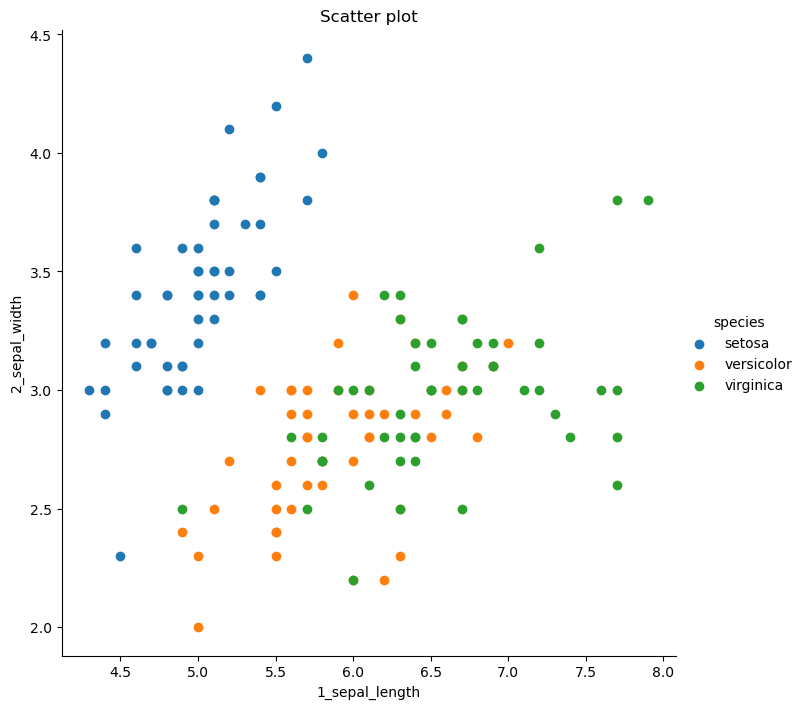

In [30]:
sns.FacetGrid(iris,hue="species",height=7).map(plt.scatter,"1_sepal_length","2_sepal_width").add_legend()
plt.title('Scatter plot')
df1=iris[["1_sepal_length","2_sepal_width",'species']]

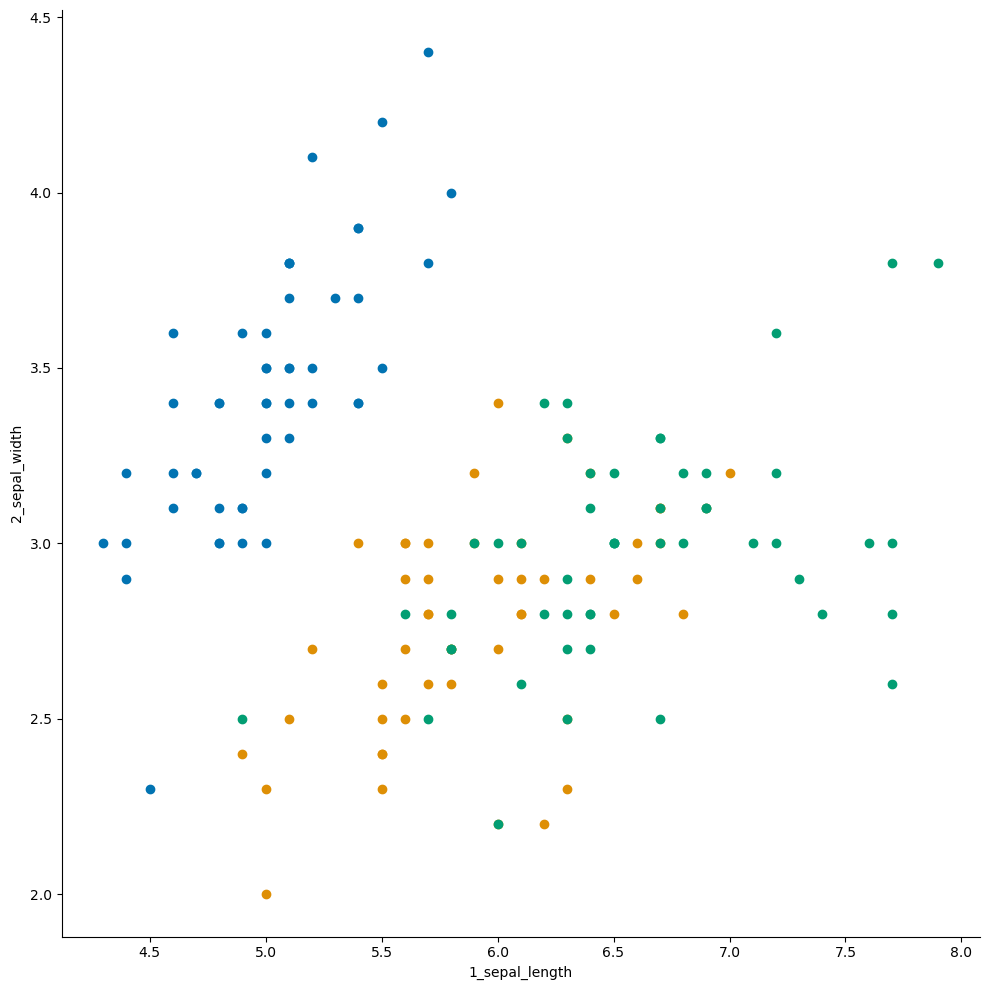

In [29]:
x_data=df1.iloc[:,0:2]
y_labels=df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

model_sk=GaussianNB(priors=None)
model_sk.fit(x_data,y_labels)

N=100
X=np.linspace(4,8,N)
Y=np.linspace(1.5,5,N)
X,Y=np.meshgrid(X,Y)

color_list=['Blues','Greens','Reds']
my_norm=colors.Normalize(vmin=-1.,vmax=1.)

g=sns.FacetGrid(iris,hue="species",height=10,palette='colorblind').map(plt.scatter,"1_sepal_length","2_sepal_width")
my_ax=g.ax



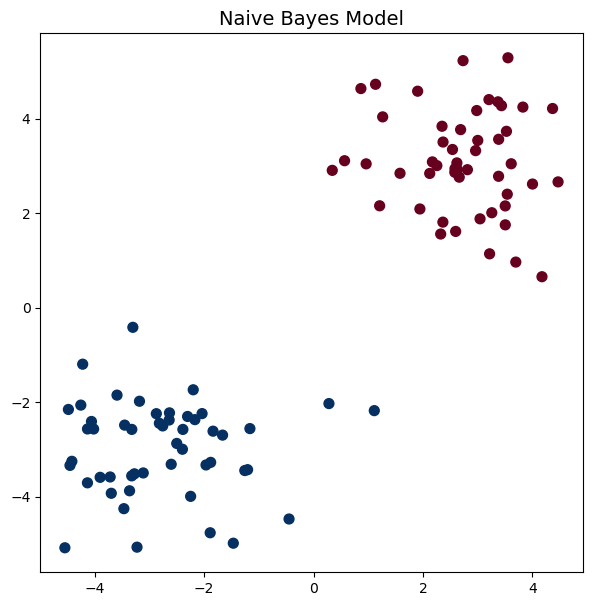

In [36]:
from sklearn.datasets import make_blobs
x,y = make_blobs(100,2,centers=[[3,3],[-3,-3]],random_state=2,cluster_std=[1,1])

fig,ax=plt.subplots(figsize=(7,7))

ax.scatter(x[:,0],x[:,1],c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model',size=14)

xlim=(-8,8)
ylim=(-8,8)

xg=np.linspace(xlim[0],xlim[1],60)
yg=np.linspace(ylim[0],ylim[1],40)
xx,yy=np.meshgrid(xg,yg)
xgrid=np.vstack([xx.ravel(),yy.ravel()]).T


In [39]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):
    scores_list=[]
    classes=len(mu_list)
    
    for p in range(classes):
        score=(norm.pdf(x=X[0],loc=mu_list[p][0][0],scale=std_list[p][0][0])
              *norm.pdf(x=X[1],loc=mu_list[p][0][1],scale=std_list[p][0][1])
              *pi_list[p])
        scores_list.append(score)
        
    return np.argmax(scores_list)

def predict_Bayes_class(X, mu_list,sigma_list):
    scores_list=[]
    classes=len(mu_list)
    
    for p in range (classes):
        score=scipy.stats.multivariate_normal.pdf(x,mean=mu_list[p],cov=sigma_list[p])
        scores_list.append(score)
        
    return np.argmax(scores_list)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


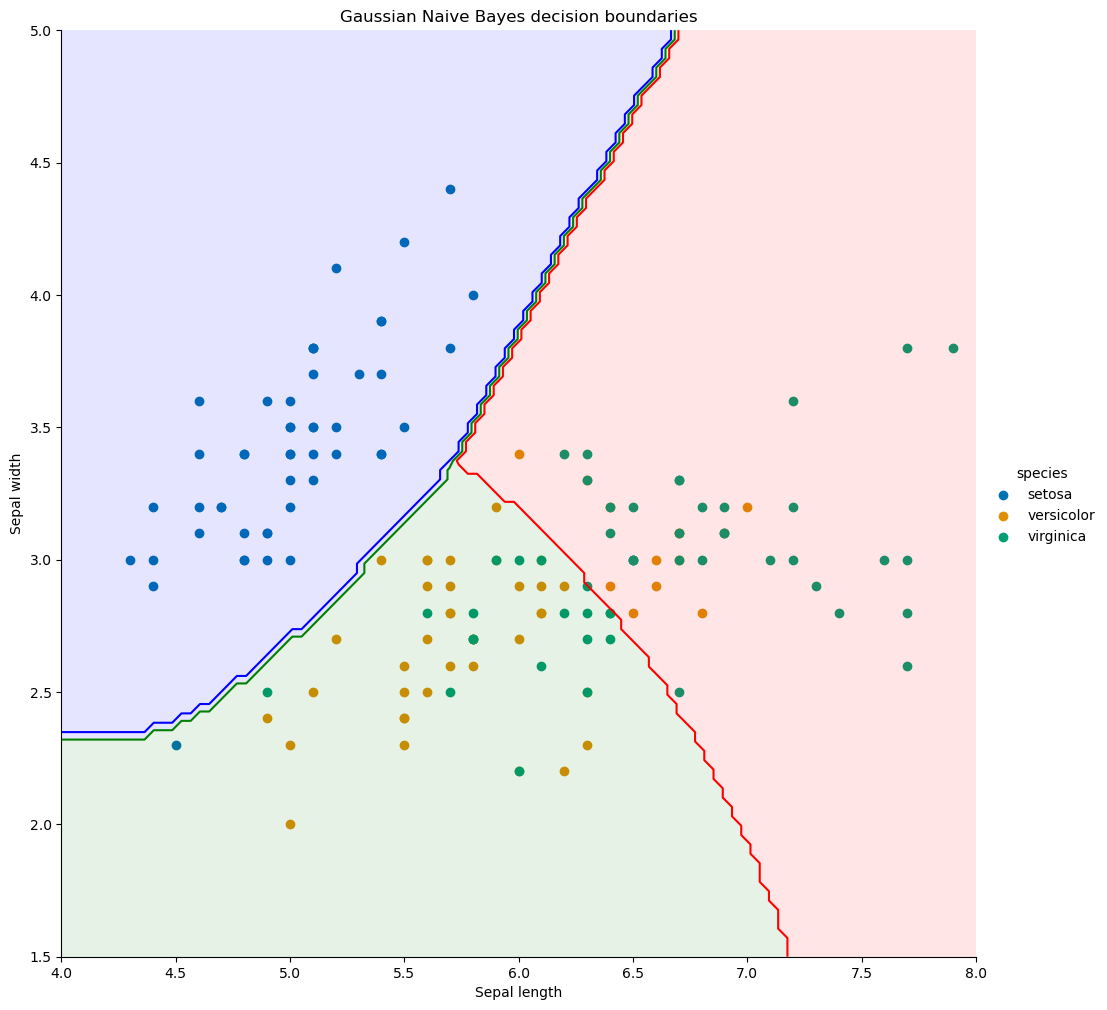

In [41]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_20040\3626235636.py:32: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(xx, yy, Xgrid_Pred.reshape(xx.shape),1,color = 'red')
C:\Users\jyoti\AppData\Local\Temp\ipykernel_20040\3626235636.py:32: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(xx, yy, Xgrid_Pred.reshape(xx.shape),1,color = 'red')


[(-8.0, 8.0), (-8.0, 8.0)]

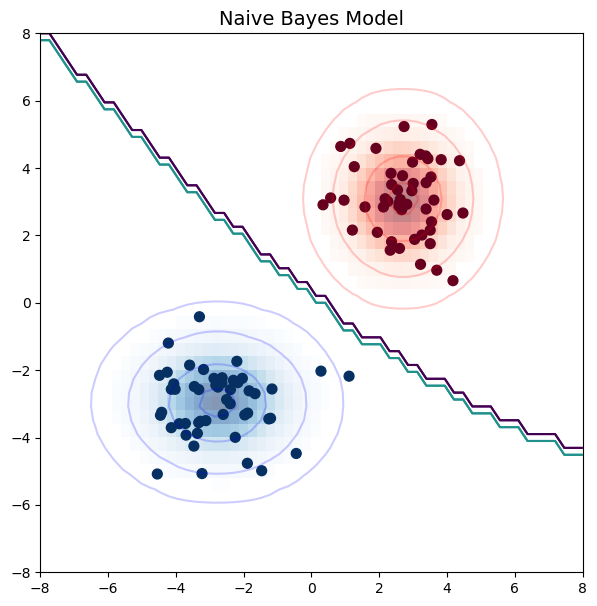

In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=[[3,3],[-3,-3]], random_state=2, cluster_std=[1,1])

fig, ax = plt.subplots(figsize = (7,7))

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-8, 8)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

#Fit model
model_sk_1 = GaussianNB(priors = None)
model_sk_1.fit(X,y)

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    Xgrid_Pred = model_sk_1.predict(Xgrid)
    ax.contour(xx, yy, Xgrid_Pred.reshape(xx.shape),1,color = 'red')
    
ax.set(xlim=xlim, ylim=ylim)

In [58]:
from sklearn.metrics import confusion_matrix
y_true=[1,1,0,0,1]
y_pred=[1,1,1,0,1]

cm = confusion_matrix(y_true,y_pred,labels=[0,1,1])
print(cm)


[[1 0 1]
 [0 0 0]
 [0 0 3]]


In [59]:
tn,fp,fn,tp=confusion_matrix(list(y_true),list(y_pred),labels=[0,1]).ravel()

print('True Positive',tp)
print('True Negative',tn)
print('False Positive',fp)
print('False Negative',fn)

True Positive 3
True Negative 1
False Positive 1
False Negative 0
